In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
#import plotly as plt
import pickle
import logging



# tqdm !!!!!

C:\Users\magnusxd\AppData\Local\Temp\ipykernel_10680\1566384425.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:



# https://www.kaggle.com/code/varunraskar/air-pressure-system-99-46-acc
# https://www.kaggle.com/code/aayushsin7a/scania-aps-failure-prediction


# load data set from csv

train_df = pd.read_csv('./data/raw/Air_pressure_system_failures_in_Scania_trucks/aps_failure_training_set.csv',na_values=["na"])
test_df = pd.read_csv('./data/raw/Air_pressure_system_failures_in_Scania_trucks/aps_failure_test_set.csv',na_values=["na"])



In [23]:
train_df.head()
test_df.head()
train_df.shape
test_df.shape


(16000, 171)

In [207]:
# test meta data

unique_values_test = test_df["class"].value_counts()
pos_class = unique_values_test.index[0]
neg_class = unique_values_test.index[1]
pos_count = unique_values_test.iloc[0]
neg_count = unique_values_test.iloc[1]
print("{} value count: {}".format(pos_class, pos_count))
print("{} value count: {}".format(neg_class, neg_count))
print("{} percentage: {}".format(pos_class, '%.2f'%(pos_count/(pos_count + neg_count))))
print("{} percentage: {}".format(pos_class, '%.2f'%(neg_count/(pos_count + neg_count))))
print("{} - {} ratio: {}".format(pos_class, neg_class, "1 : {}".format(pos_count/neg_count)))
print("{} - {} ratio: {}".format(pos_class, neg_class, "3 : {}".format((pos_count/neg_count)*3)))


neg value count: 15625
pos value count: 375
neg percentage: 0.98
neg percentage: 0.02
neg - pos ratio: 1 : 41.666666666666664
neg - pos ratio: 3 : 125.0


In [46]:
# train meta data

unique_values_train = train_df["class"].value_counts()
pos_class = unique_values_train.index[0]
neg_class = unique_values_train.index[1]
pos_count = unique_values_train.iloc[0]
neg_count = unique_values_train.iloc[1]
print("{} value count: {}".format(pos_class, pos_count))
print("{} value count: {}".format(neg_class, neg_count))
print("{} percentage: {}".format(pos_class, '%.2f'%(pos_count/(pos_count + neg_count))))
print("{} percentage: {}".format(pos_class, '%.2f'%(neg_count/(pos_count + neg_count))))
print("{} - {} ratio: {}".format(pos_class, neg_class, "1 : {}".format(pos_count/neg_count)))
print("{} - {} ratio: {}".format(pos_class, neg_class, "3 : {}".format((pos_count/neg_count)*3)))

neg value count: 59000
pos value count: 1000
neg percentage: 0.98
neg percentage: 0.02
neg - pos ratio: 1 : 59.0
neg - pos ratio: 3 : 177.0


In [3]:
#  merge
all_df =  pd.concat([train_df, test_df], axis=0)



In [14]:
# merged data meta data

unique_values_all = all_df["class"].value_counts()
pos_class = unique_values_all.index[0]
neg_class = unique_values_all.index[1]
pos_count = unique_values_all.iloc[0]
neg_count = unique_values_all.iloc[1]
print("{} value count: {}".format(pos_class, pos_count))
print("{} value count: {}".format(neg_class, neg_count))
print("{} percentage: {}".format(pos_class, '%.2f'%(pos_count/(pos_count + neg_count))))
print("{} percentage: {}".format(pos_class, '%.2f'%(neg_count/(pos_count + neg_count))))
print("{} - {} ratio: {}".format(pos_class, neg_class, "1 : {}".format(pos_count/neg_count)))
print("{} - {} ratio: {}".format(pos_class, neg_class, "4 : {}".format((pos_count/neg_count)*4)))

neg value count: 74625
pos value count: 1375
neg percentage: 0.98
neg percentage: 0.02
neg - pos ratio: 1 : 54.27272727272727
neg - pos ratio: 4 : 217.0909090909091


In [29]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
aa_000,76000.0,6.115976e+04,2.647366e+05,0.0,860.0,30813.0,48840.0,4.294967e+07
ab_000,17308.0,7.255604e-01,3.311913e+00,0.0,0.0,0.0,0.0,2.040000e+02
ac_000,71739.0,3.564398e+08,7.952530e+08,0.0,16.0,154.0,970.0,2.130707e+09
ad_000,57158.0,1.506300e+05,3.590593e+07,0.0,24.0,128.0,430.0,8.584298e+09
ae_000,72810.0,6.736959e+00,1.534465e+02,0.0,0.0,0.0,0.0,2.105000e+04
...,...,...,...,...,...,...,...,...
ee_007,75137.0,3.475611e+05,1.707593e+06,0.0,112.0,41260.0,168046.0,1.195801e+08
ee_008,75137.0,1.398968e+05,4.692327e+05,0.0,0.0,3862.0,139500.0,1.926740e+07
ee_009,75137.0,8.424984e+03,4.875440e+04,0.0,0.0,0.0,2000.0,4.570398e+06
ef_000,72514.0,8.519734e-02,4.179600e+00,0.0,0.0,0.0,0.0,4.820000e+02


In [4]:
# clean data

# how does it look (Nan Values)

nan_values = all_df.isna().sum(axis=0).div(all_df.shape[0], axis=0).mul(100).sort_values(ascending=False)



# DROP NOT TO MANY (
# impu




# X  We will discard features with more than 70% missing values.
# ?  For features with missing values less than 5%, we can drop those rows.
# X  For features with missing values between 5–15%, we will impute those missing values using mean/median.
# ? Now for the rest of the features with missing value% between 15–70% missing values, use model based imputation technique.

In [5]:
nan_values.head



<bound method NDFrame.head of br_000    82.096053
bq_000    81.188158
bp_000    79.553947
bo_000    77.248684
cr_000    77.226316
            ...    
cj_000     0.557895
ci_000     0.557895
bt_000     0.256579
aa_000     0.000000
class      0.000000
Length: 171, dtype: float64>

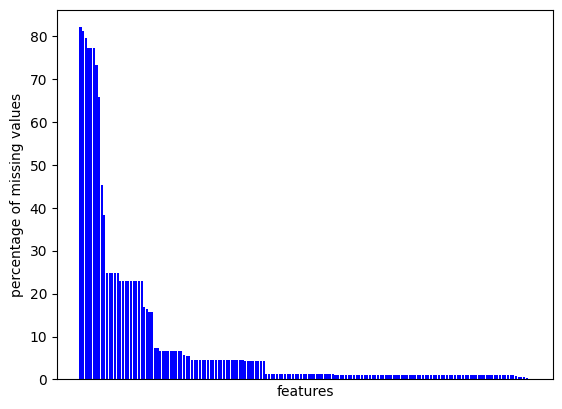

In [120]:
fig, ax = plt.subplots()

ax.bar(x=nan_values.index, height=nan_values.values, color="blue")
plt.xticks([])
ax.set_ylabel('percentage of missing values')
ax.set_xlabel('features')

# plt.show()
# plt.savefig("pictures/scania_air_pressure_all_missing_values_percentage.svg")

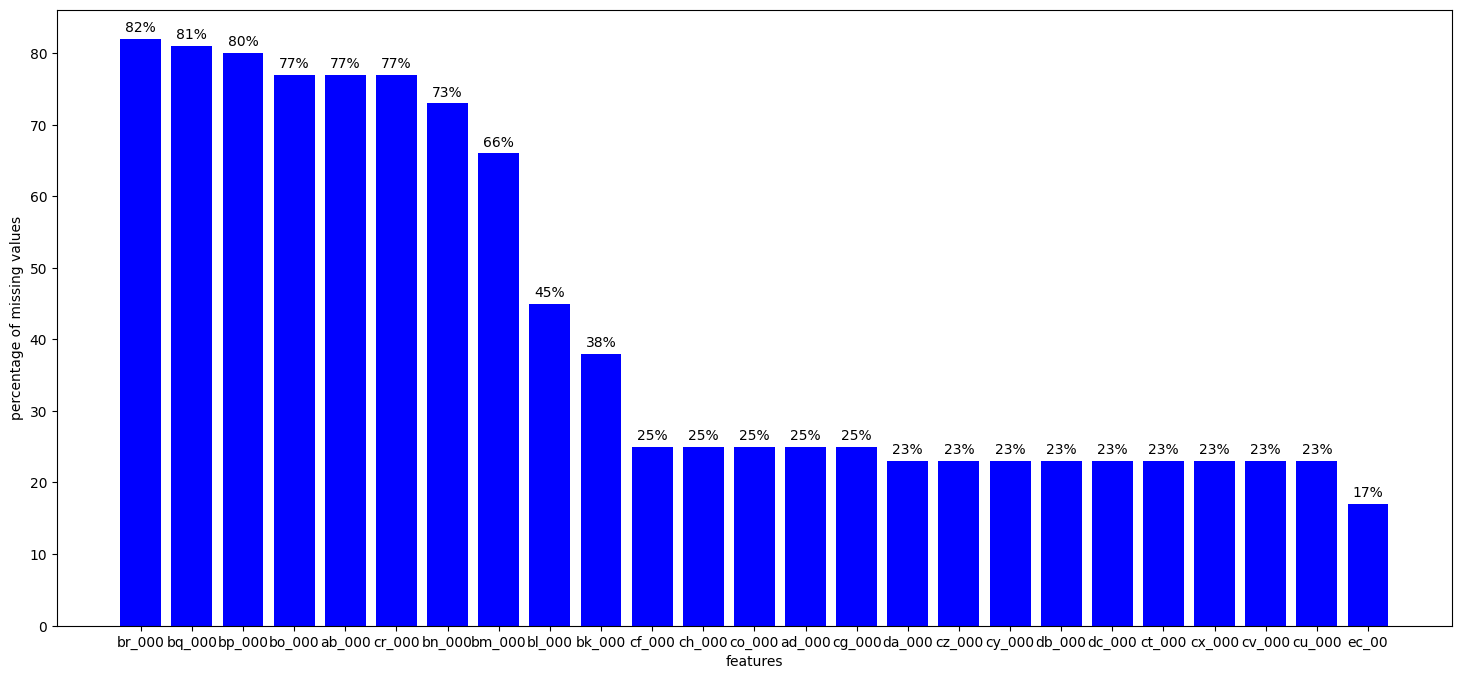

In [191]:
fig, ax = plt.subplots()

features = nan_values.index[0:25].to_list()
values = nan_values.values[0:25].tolist()
values = list(map(lambda x:float('%.0f'%(x)), values))


ax.bar(x=features, height=values, color="blue")

fig.set_size_inches((18,8))

ax.set_ylabel('percentage of missing values')
ax.set_xlabel('features')

x = 0  # the label locations
width = 0.8 # the width of the bars
multiplier = 0

for value in values:
    offset = width * multiplier * 1.25
    rects = ax.bar(x + offset , value, width, color="blue")
    ax.bar_label(rects, padding=3, fmt=r'{:.0f}%')
    multiplier += 1

# plt.show()
plt.savefig("pictures/scania_air_pressure_25_missing_values_percentage.svg")


In [6]:
# missing values statistics

max_values = all_df.shape[0] * all_df.shape[1]
missing_values = all_df.isna().sum(axis=0).sum()
missing_values_percentage = missing_values/max_values


print("maximum value count: {}".format(max_values))
print("missing value count: {}".format(missing_values))
print("missing value percentage: {}".format('%.2f'%(missing_values_percentage)))

maximum value count: 12996000
missing value count: 1078695
missing value percentage: 0.08


In [6]:
# drop columns with too many missing values > 50
features_to_be_dropped = nan_values[nan_values>50].index
all_df = all_df.drop(labels=features_to_be_dropped, axis=1)




In [7]:
# drop constant !!!!!!!!!!!!!!!!!!!!!!!
plain_features = all_df.drop(["class"], axis=1)

variance = plain_features.var(axis=0)
print(variance[variance == 0].index)
all_df = all_df.drop(variance[variance == 0].index, axis=1)





Index(['cd_000'], dtype='object')


In [11]:
all_df.shape

(76000, 162)

In [79]:
# discrete, continuous values
# plain_features = all_df.drop(["class"], axis=1)
# not_nan_value_mask = plain_features.notna()
# filled_features = plain_features.fillna(1)
# continuous_value_mask = filled_features[filled_features % 1 != 0]
# merged_mask = not_nan_value_mask & continuous_value_mask
# 
# sum_continuous_values = merged_mask.sum()
# sum_continuous_values[sum_continuous_values > 0].index

#'bt_000', 'ci_000', 'cj_000', 'ck_000', 'ec_00'


Index(['bt_000', 'ci_000', 'cj_000', 'ck_000', 'ec_00'], dtype='object')

In [8]:
# split data into train test ...


features = all_df.drop(["class"], axis=1)
# features = all_df.drop(["class"], axis=1).values
labels = all_df["class"].transform(lambda x: 0 if x=="pos" else 1)
# labels = all_df["class"].transform(lambda x: 0 if x=="pos" else 1).to_numpy()


    


In [9]:


from sklearn.model_selection import StratifiedKFold

sgkf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1337)

split_iterator = sgkf.split(features, labels)

duplicate_dict = {}

for i, (train_index, test_index) in enumerate(split_iterator):
    
    train_features=features.iloc[train_index]
    # train_features=features[train_index]
    train_labels=labels.iloc[train_index]
    # train_labels=labels[train_index]
    test_features=features.iloc[test_index]
    # test_features=features[test_index]
    test_labels=labels.iloc[test_index]
    # test_labels=labels[test_index]
    
    for j in enumerate(test_index):
        if duplicate_dict.get(j) == None:
            duplicate_dict[j] = 1 
        else :
            duplicate_dict[j] = duplicate_dict.get(j)+1
    
    print(f"\n\nFold {i}:")
    
    print("\n TRAIN_DATA")
    
    selected_labels = labels.iloc[train_index]
    # selected_labels = labels[train_index]
    pos_count = selected_labels[selected_labels == 1].count()
    # pos_count = len(selected_labels[selected_labels == 1])
    neg_count = selected_labels[selected_labels == 0].count()
    # neg_count = len(selected_labels[selected_labels == 0])
    
    
    print("pos value count: {}".format(pos_count))
    print("neg value count: {}".format(neg_count))
    print("pos percentage: {}".format('%.2f'%(pos_count/(pos_count + neg_count))))
    print("neg percentage: {}".format('%.2f'%(neg_count/(pos_count + neg_count))))
    print("pos - neg ratio: {}".format("1 : {}".format(pos_count/neg_count)))
    
    
    print("\n TEST_DATA")
    
    selected_labels = labels.iloc[test_index]
    # selected_labels = labels[test_index]
    pos_count = selected_labels[selected_labels == 1].count()
    # pos_count = len(selected_labels[selected_labels == 1])
    neg_count = selected_labels[selected_labels == 0].count()
    # neg_count = len(selected_labels[selected_labels == 0])
    
    
    print("pos value count: {}".format(pos_count))
    print("neg value count: {}".format(neg_count))
    print("pos percentage: {}".format('%.2f'%(pos_count/(pos_count + neg_count))))
    print("neg percentage: {}".format('%.2f'%(neg_count/(pos_count + neg_count))))
    print("pos - neg ratio: {}".format("1 : {}".format(pos_count/neg_count)))
    

duplicate_counter = 0 
for value in duplicate_dict.values():
    if value > 1:
        duplicate_counter += 1
print("\n\nNumber of duplicates indices over all 5 different test sets: {}".format(duplicate_counter))



Fold 0:

 TRAIN_DATA
pos value count: 59700
neg value count: 1100
pos percentage: 0.98
neg percentage: 0.02
pos - neg ratio: 1 : 54.27272727272727

 TEST_DATA
pos value count: 14925
neg value count: 275
pos percentage: 0.98
neg percentage: 0.02
pos - neg ratio: 1 : 54.27272727272727


Fold 1:

 TRAIN_DATA
pos value count: 59700
neg value count: 1100
pos percentage: 0.98
neg percentage: 0.02
pos - neg ratio: 1 : 54.27272727272727

 TEST_DATA
pos value count: 14925
neg value count: 275
pos percentage: 0.98
neg percentage: 0.02
pos - neg ratio: 1 : 54.27272727272727


Fold 2:

 TRAIN_DATA
pos value count: 59700
neg value count: 1100
pos percentage: 0.98
neg percentage: 0.02
pos - neg ratio: 1 : 54.27272727272727

 TEST_DATA
pos value count: 14925
neg value count: 275
pos percentage: 0.98
neg percentage: 0.02
pos - neg ratio: 1 : 54.27272727272727


Fold 3:

 TRAIN_DATA
pos value count: 59700
neg value count: 1100
pos percentage: 0.98
neg percentage: 0.02
pos - neg ratio: 1 : 54.27272727

In [49]:
# normalize train and test with min max sacling

# 1 min max scaling -> [0,1] no distortion
# keep min max for test data processing !!!!

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)



# df = pd.DataFrame({'angles': [0, 3, 4],
#                    'degrees': [360, 180, 360]},
#                   index=['circle', 'triangle', 'rectangle'])
# s_min = pd.Series([0,180], index=['angles','degrees'])
# s_min_neg = s_min * (-1)
# s_max = pd.Series([4,360], index=['angles','degrees'])
# s_max_min = s_max.add(s_min_neg)
# df = df.add(s_min_neg, axis=1)
# df = df.divide(s_max_min, axis=1)
# df


In [50]:
# 2 knn imputation (each feature is equally important for final result (min max scaling) -> distance based metric)
# keep train KNNimputer for filling missing values in test data


from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights="distance", metric="nan_euclidean")


In [51]:
imputer = imputer.fit(train_features)

In [52]:
train_features_imputed = imputer.transform(train_features) # ~ 11 min (4/5)n ^2 = 16/25 n2

In [70]:
test_features_imputed = imputer.transform(test_features) # ~ 2.4 (4/5)n * 1/5n) = 4/25 n2

In [69]:
# maybe add standard scaler for pulling near values over a wider area and make differenciating more ez (important for non tree methods) https://stackoverflow.com/questions/49408371/when-to-use-min-max-scalar-and-standard-scalar
# maybe dimensionallity reduction

array([[7.35372321e-04, 1.63326085e-07, 5.82201949e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.24270734e-05, 1.25199247e-03, 1.46486164e-02,
        6.97162794e-03, 1.16661344e-03, 4.81340345e-04, 1.53597242e-02,
        0.00000000e+00, 4.08573652e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.40953673e-02, 1.36432315e-02, 2.25156235e-03,
        3.81504478e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.55877856e-03, 1.20473586e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.88471497e-03, 2.47527480e-03, 6.35179307e-06,
        0.00000000e+00, 9.48685938e-04, 2.45460634e-04, 1.25196393e-04,
        4.32211857e-05, 3.82040599e-03, 2.70144765e-03, 3.85482761e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.37726597e-03,
        2.47334483e-03, 2.84435459e-03, 3.34127436e-03, 4.363048

In [26]:
print(train_features.shape)
print(np.count_nonzero(np.isnan(train_features)))
print(np.count_nonzero(~np.isnan(train_features)))
print(train_features_imputed.shape)
print(np.count_nonzero(np.isnan(train_features_imputed)))
print(np.count_nonzero(~np.isnan(train_features_imputed)))
print(train_labels.shape)
print(test_features.shape)
print(np.count_nonzero(np.isnan(test_features)))
print(np.count_nonzero(~np.isnan(test_features)))
print(test_features_imputed.shape)
print(np.count_nonzero(np.isnan(test_features_imputed)))
print(np.count_nonzero(~np.isnan(test_features_imputed)))
print(test_labels.shape)

(60800, 161)
485499
9303301
(60800, 161)
0
9788800
(60800,)
(15200, 161)
125868
2321332
(15200, 161)
0
2447200
(15200,)


In [ ]:
# explore data 

# How to handle Nan Values
# 1) drop column if to many are missing more than 50% missing

# 2) handle histogram values (10 same prefix 'ag', 'ay', 'az', 'ba', 'cn', 'cs', 'ee')
# 3) predict missing values y using an iterative model MICE ??? ( use train and test to for this ???? test influences train !!!))) bad practice
# 4) important feature selection RFE ?? 15  x ?

# ?) correlation matrix spearman remove collinear fields https://www.kaggle.com/code/evgenigeorg/classification-with-mlr3-r-total-cost-9500/notebook r
## simple imoutation (scatter plots
# 5) maybe drop columns with no variance / standard deviation = 0??? https://www.kaggle.com/code/aayushsin7a/scania-aps-failure-prediction
#It is always a good practice to identify and replace missing values for each column in your input data prior to modeling your prediction task. This is called missing data imputation, or imputing for short.

#We can perform some basic handling of missing data in the following manner:

 #   We will discard features with more than 70% missing values.
 #   For features with missing values less than 5%, we can drop those rows.
 #   For features with missing values between 5–15%, we will impute those missing values using mean/median.
 #   Now for the rest of the features with missing value% between 15–70% missing values, use model based imputation technique.

# matrix decomposition / dimensionality reduction techniques PCA Principal Component Analysis https://www.kaggle.com/code/datark1/scania-aps-failures-a-pipeline-with-pca-and-ml
 
# Feature selection by univariate statistics: (correlation)  SelectKBest / chi squared distribution  pca https://www.kaggle.com/code/romulomadu/minimizing-total-cost-result-9020-00

# Scaling Data Normalization (Standatd SLacer ???? https://www.kaggle.com/code/romulomadu/minimizing-total-cost-result-9020-00

# continous vs discrete variables !!!!! https://www.kaggle.com/code/leekahwin/oversampling-or-undersampling-classification-task
# Skewness of variable (shifted normal distribution)
# Impute Categorical Variable with Mode
# Impute all other Left Skewd Variable with Median
# scaling
# feature selectin SelectFrom Mode

# what preprocessing is necessary

# pickle



## over under sampling https://www.kaggle.com/code/leekahwin/oversampling-or-undersampling-classification-task

## merging into one table https://www.kaggle.com/code/leekahwin/oversampling-or-undersampling-classification-task

In [ ]:
# save meta data in json
# error handling
# control randomness for reproduction

# 1) split data into 5 different permutation (keep the class balance)
# 1.1) -> with laying back or without ??? sklearn.model_selection.StratifiedKFold / StratifiedShuffleSplit ??? https://scikit-learn.org/stable/modules/cross_validation.html#k-fold
# 1.2) -> stratified train test split ??? sklearn.model_selection.StratifiedGroupKFold -> 5 different non overlapping groups (each fold has distinct test set) 
# choose 1.2 distinct groups (each group is test set once) 

# 2) clean/repair data (do not mix train and test data! prevent indirect influence from train to test)

# 3) data normalization 
# 3.1) scaler (euclidian distance is used in training, faster convergence)
# 3.2) (normalization = scaling)

# -> SAVE # dataset, fold/ test group number, (train) class ratio

# 4) preprocessing with different methods (upsampling downsampling) / track amount of samples in each class before and after 

# -> SAVE # dataset, fold/ test group number, sampling method, train class ratio

# 5) train data
# 5.1) recreate classifier for MLPClassifier to exchange loss function https://discuss.pytorch.org/t/sklearn-model-to-pytorch-model/33532

# -> SAVE # dataset, fold/ test group number, sampling method, train class ratio, train method,


# 6) predict with -> test data -> check output (softmax vs class )

# 7) run metrics (mean) -> which metrics ??? ???
# -> SAVE # dataset, sampling method, train class ratio, train method, array:[metric, value]

# 8) difference to base line -> one base line for each train algorithm ->  which (sampling/cost method) was better for dataset X train algorithm ??? -> general statement possible ???
# -> SAVE # dataset, sampling method, train class ratio, train method, array:[metric, value]

# 9) graphical view ???
# 9.1) table, (mark best) https://plotly.com/python/table/
# https://plotly.com/python/
# https://plotly.com/python/LaTeX/


In [ ]:
# config json for controlling the flow 

# first write run config and (step)config + (step config and info) from previous steps
# overwrite information and current config while adding current config


# steps [preprocessing, sampling, training, metric]


# preprocessing

# folder name: <step_start_date>
# pickle names (5x): 
# fold<number>_train_features.npy
# fold<number>_train_labels.npy
# fold<number>_test_features.npy
# fold<number>_test_labels.npy
# config name: preprocessing_config_<step_start_date>.json [preprocessing config]
# information: preprocessing_information_<step_start_date>.json -> obj fold : (pos_neg_train ratio, pos_train_number, neg_train_number)
# run config
# log


# sampling

# folder name: <step_start_date>
# pickle names (5xN): 
# <sampling_methods>_fold<number>_train_features.npy
# <sampling_methods>_fold<number>_train_labels.npy

# config name: sampling_config_<step_start_date>.json [sampling config]
# information: sampling_information_<step_start_date>.json  -> obj sampling : 5x obj fold : (pos_neg_train ratio, pos_train_number, neg_train_number)
# run config
# log


# training 

# folder name: <step_start_date>
# pickle names (5xNxM): 
# <model_name>_<sampling_methods>_fold_<number>_model.pth
# config name: training_config_<step_start_date>.json [training config]
# information: training_information_<step_start_date>.json  -> model_name sampling_methods fold 
# run config
# log